In [1]:

# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from mtcnn.mtcnn import MTCNN

import os
import numpy as np
import pandas as pd

from skimage.color import gray2rgb
from PIL import Image

In [6]:
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
  # load the image
  data = pyplot.imread(filename)
  # plot the image
  pyplot.imshow(data)
  # get the context for drawing boxes
  ax = pyplot.gca()
  # plot each box
  for result in result_list:
    # get coordinates
    x, y, width, height = result['box']
    
    xl, yl = result['keypoints']['right_eye']
    xr, yr = result['keypoints']['left_eye']
    # create the shape
    rect = Rectangle((x, y), width, height, fill=False, color='red')
    
    rect2 = Rectangle((xr, yr), xl-xr, yl-xr, fill=False, color='green')
    # draw the box
    ax.add_patch(rect)
    ax.add_patch(rect2)
    # show the plot
    pyplot.show()


In [4]:
def isFront(result_list):
    # load the image
    
    for result in result_list:
        if(result['keypoints']['right_eye'] == None or result['keypoints']['left_eye'] == None or result['box'][2]<35):
            return False
        else:
            x, y, width, height = result['box']

            xl, yl = result['keypoints']['right_eye']
            xr, yr = result['keypoints']['left_eye']
            
            if 2.4>width/(xl-xr)>1.6:
                return True
    
    return False

In [5]:
# Directory containing images
PATH = 'wiki_crop'
folders = os.listdir(PATH)

# Create MTCNN detector
detector = MTCNN()

i=0

for folder in folders:
    if i>9000:
        break
    print(folder)
    filenames = os.listdir(os.path.join(PATH, folder))

    for filename in filenames:
        
        # Construct full path to the image
        filepath = os.path.join(PATH, folder, filename)
        
        # Read image using matplotlib
        pixels = pyplot.imread(filepath)
        
        # Convert grayscale image to RGB if needed
        if len(pixels.shape) == 2:
            pixels = gray2rgb(pixels)
        
        faces = detector.detect_faces(pixels)
        if isFront(faces):
                
            x, y, width, height = faces[0]['box']
            # Ensure box is within image boundaries
            x1, y1 = max(x, 0), max(y, 0)
            x2, y2 = min(x + width, pixels.shape[1]), min(y + height, pixels.shape[0])
            # Crop the image
            cropped_face = pixels[y1:y2, x1:x2]
            # Save the cropped image
            cropped_image = Image.fromarray(cropped_face)
            cropped_image.save(os.path.join('croppedImages', f"cropped_{filename}"))
            # Draw boxes around the faces
            i+=1
            
            if i>9000:
                break

00
1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 23ms/step


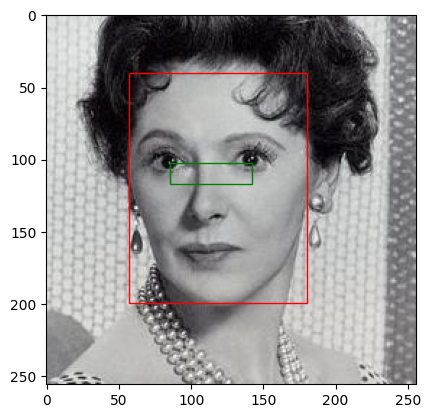

1/1 [==============================] - 0s 57ms/step


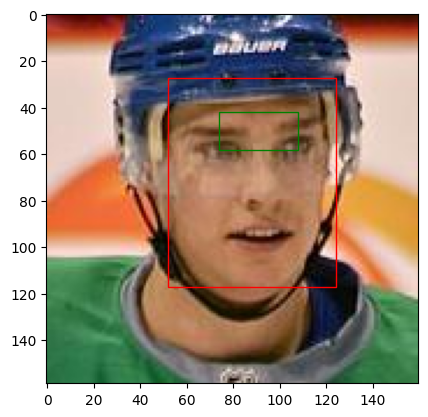

1/1 [==============================] - 0s 23ms/step


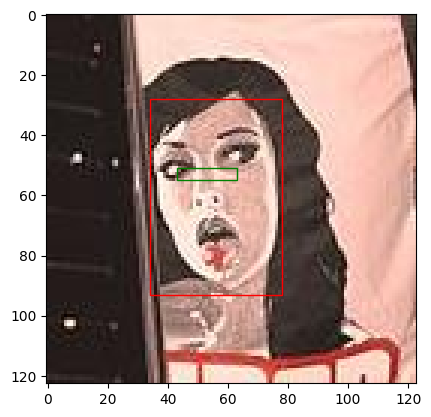

1/1 [==============================] - 0s 23ms/step


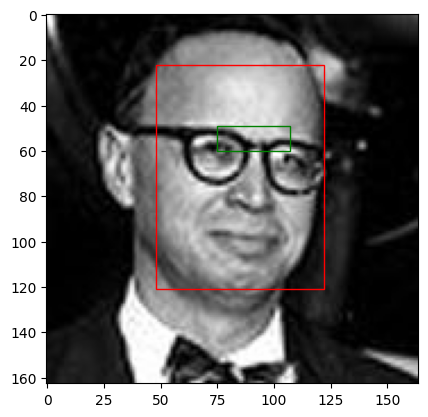

In [9]:
j=0
for folder in folders:
    if(j>2):break
    
    filenames = os.listdir(os.path.join(PATH, folder))
    for filename in filenames:
        # Construct full path to the image
        filepath = os.path.join(PATH, folder, filename)
        
        # Read image using matplotlib
        pixels = pyplot.imread(filepath)
        
        # Convert grayscale image to RGB if needed
        if len(pixels.shape) == 2:
            pixels = gray2rgb(pixels)
        
        faces = detector.detect_faces(pixels)
        draw_image_with_boxes(filepath, faces)
        if(j>2):break
        j+=1

In [6]:
# # Directory containing images
# PATH = 'wiki_crop'
# folders = os.listdir(PATH)

# # Create MTCNN detector
# det = MTCNN()

# j=0

# for i in range(40,len(folders)):
#     if j>326:
#         break
#     print(folders[i])
#     filenames = os.listdir(os.path.join(PATH, folders[i]))

#     for filename in filenames:
#         # Read image using matplotlib
#         pixels = pyplot.imread(os.path.join(PATH, folders[i], filename))
        
#         # Convert grayscale image to RGB if needed
#         if len(pixels.shape) == 2:
#             pixels = gray2rgb(pixels)
        
#         faces = det.detect_faces(pixels)
        
#         if isFront(filepath, faces):
                
#             x, y, width, height = faces[0]['box']
#             # Ensure box is within image boundaries
#             x1, y1 = max(x, 0), max(y, 0)
#             x2, y2 = min(x + width, pixels.shape[1]), min(y + height, pixels.shape[0])
#             # Crop the image
#             cropped_face = pixels[y1:y2, x1:x2]
#             # Save the cropped image
#             cropped_image = Image.fromarray(cropped_face)
#             cropped_image.save(os.path.join('croppedImages', f"cropped_{filename}"))
#             # Draw boxes around the faces
#             j+=1
            
#             if j>326:
#                 break

40
1/1 [==============================] - 0s 37ms/step
41
1/1 [==============================] - 0s 36ms/step
